# In-Class Assignment 20 - Evan Callaghan

In [1]:
## pip install -U scikit-fuzzy

## 1. a) Using the pandas library to read the csv data file and create a data-frame called customers

import boto3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from skfuzzy.cluster import cmeans
from sklearn.metrics import silhouette_score

## Defining the bucket
s3 = boto3.resource('s3')
bucket_name = 'data-445-bucket-callaghan'
bucket = s3.Bucket(bucket_name)

## Defining the csv file
file_key = 'customers.csv'

bucket_object = bucket.Object(file_key)
file_object = bucket_object.get()
file_content_stream = file_object.get('Body')

customers = pd.read_csv(file_content_stream)

customers.head()

,ID,Visit_Time,Average_Expense,Sex,Age
0,1,3,5.7,0,10
1,2,5,14.5,0,27
2,3,16,33.5,0,32
3,4,5,15.9,0,30
4,5,16,24.9,0,23


In [2]:
## b) Using the appropriate Python commands to remove the ID variable

customers = customers.drop(columns = ['ID'])

In [3]:
## c) Using the appropriate standardization formula to put all the variables on the same scale

scaler = MinMaxScaler(feature_range = (0,1))
customers[['Visit_Time_0_1', 'Average_Expense_0_1', 'Age_0_1']] = scaler.fit_transform(customers[['Visit_Time', 'Average_Expense', 'Age']])

customers.head()

,Visit_Time,Average_Expense,Sex,Age,Visit_Time_0_1,Average_Expense_0_1,Age_0_1
0,3,5.7,0,10,0.117647,0.041096,0.051282
1,5,14.5,0,27,0.235294,0.342466,0.487179
2,16,33.5,0,32,0.882353,0.993151,0.615385
3,5,15.9,0,30,0.235294,0.390411,0.564103
4,16,24.9,0,23,0.882353,0.698630,0.384615


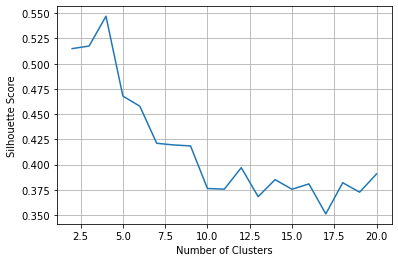

In [4]:
## d) Using the silhouette score to estimate the number of cluster for this dataset

## Defining the input data
X = customers[['Sex', 'Visit_Time_0_1', 'Average_Expense_0_1', 'Age_0_1']]

## Defining a list of clusters
sil_scores = []

for i in range(2, 21):
    
    ## Building the model
    kmeans_md = KMeans(n_clusters = i, n_init = 20).fit(X)
    
    ## Extracting cluster labels
    kmeans_labels = kmeans_md.labels_
    
    sil_scores.append(silhouette_score(X, kmeans_labels))


## Visualizing the silhouette score results
plt.plot(range(2, 21), sil_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()

In [5]:
## e) Using the cmeans function from the skfuzzy.cluster library to cluster the customers into the 
## number of clusters estimated from the last part (4)

fc, W, u0, d, jm, p, pc = cmeans(X.T, c = 4, m = 1.25, error = 1e-6, maxiter = 1000)

In [6]:
##  f) Changing the likelihoods to cluster labels using 70% as threshold

customers['Cluster'] = np.nan

customers['Cluster'] = np.where(W[0] > 0.7, 1, customers['Cluster'])
customers['Cluster'] = np.where(W[1] > 0.7, 2, customers['Cluster'])
customers['Cluster'] = np.where(W[2] > 0.7, 3, customers['Cluster'])
customers['Cluster'] = np.where(W[3] > 0.7, 4, customers['Cluster'])

customers.head()

,Visit_Time,Average_Expense,Sex,Age,Visit_Time_0_1,Average_Expense_0_1,Age_0_1,Cluster
0,3,5.7,0,10,0.117647,0.041096,0.051282,3.0
1,5,14.5,0,27,0.235294,0.342466,0.487179,3.0
2,16,33.5,0,32,0.882353,0.993151,0.615385,1.0
3,5,15.9,0,30,0.235294,0.390411,0.564103,3.0
4,16,24.9,0,23,0.882353,0.698630,0.384615,1.0


In [7]:
## Describing each of the clusters

## Cluster 1

cluster_1 = customers[customers['Cluster'] == 1].reset_index(drop = True)
cluster_1.describe()

## This cluster contains all females with an average age of 27 and a much higher average expense and average
## visit time compared to the other female cluster (cluster 3).

,Visit_Time,Average_Expense,Sex,Age,Visit_Time_0_1,Average_Expense_0_1,Age_0_1,Cluster
count,8.000000,8.000000,8.0,8.000000,8.000000,8.000000,8.000000,8.0
mean,14.375000,25.587500,0.0,26.625000,0.786765,0.722175,0.477564,1.0
std,1.846812,4.647714,0.0,5.629958,0.108636,0.159168,0.144358,0.0
min,12.000000,18.800000,0.0,18.000000,0.647059,0.489726,0.256410,1.0
25%,13.500000,22.950000,0.0,22.750000,0.735294,0.631849,0.378205,1.0
50%,14.000000,25.400000,0.0,26.000000,0.764706,0.715753,0.461538,1.0
75%,16.000000,28.500000,0.0,32.250000,0.882353,0.821918,0.621795,1.0
max,17.000000,33.500000,0.0,33.000000,0.941176,0.993151,0.641026,1.0


In [8]:
## Cluster 2

cluster_2 = customers[customers['Cluster'] == 2].reset_index(drop = True)
cluster_2.describe()

## This cluster contains all males with an average age of 31 and a much higher average expense and average
## visit time compared to the other male cluster (cluster 4).

,Visit_Time,Average_Expense,Sex,Age,Visit_Time_0_1,Average_Expense_0_1,Age_0_1,Cluster
count,16.000000,16.000000,16.0,16.000000,16.000000,16.000000,16.000000,16.0
mean,12.250000,25.362500,1.0,31.187500,0.661765,0.714469,0.594551,2.0
std,2.955221,4.336339,0.0,8.336416,0.173837,0.148505,0.213754,0.0
min,8.000000,17.800000,1.0,17.000000,0.411765,0.455479,0.230769,2.0
25%,10.000000,21.100000,1.0,26.000000,0.529412,0.568493,0.461538,2.0
50%,12.000000,25.450000,1.0,28.500000,0.647059,0.717466,0.525641,2.0
75%,13.250000,28.275000,1.0,36.750000,0.720588,0.814212,0.737179,2.0
max,18.000000,33.700000,1.0,47.000000,1.000000,1.000000,1.000000,2.0


In [9]:
## Cluster 3

cluster_3 = customers[customers['Cluster'] == 3].reset_index(drop = True)
cluster_3.describe()

## This cluster contains all females with an average age of 17, average expense of $13, and average visit time of
## 5. These values are much lower than the other all female cluster (cluster 1).

,Visit_Time,Average_Expense,Sex,Age,Visit_Time_0_1,Average_Expense_0_1,Age_0_1,Cluster
count,11.000000,11.000000,11.0,11.00000,11.000000,11.000000,11.000000,11.0
mean,4.909091,12.709091,0.0,17.00000,0.229947,0.281133,0.230769,3.0
std,1.700267,6.060108,0.0,6.78233,0.100016,0.207538,0.173906,0.0
min,3.000000,4.600000,0.0,9.00000,0.117647,0.003425,0.025641,3.0
25%,3.500000,7.150000,0.0,12.00000,0.147059,0.090753,0.102564,3.0
50%,5.000000,14.500000,0.0,16.00000,0.235294,0.342466,0.205128,3.0
75%,6.000000,16.000000,0.0,20.00000,0.294118,0.393836,0.307692,3.0
max,8.000000,23.800000,0.0,30.00000,0.411765,0.660959,0.564103,3.0


In [10]:
## Cluster 4

cluster_4 = customers[customers['Cluster'] == 4].reset_index(drop = True)
cluster_4.describe()

## This cluster contains all males with an average age of 15, average expense of $11, and average visit time of
## 5.4. These values are much lower than the other all male cluster (cluster 2).

,Visit_Time,Average_Expense,Sex,Age,Visit_Time_0_1,Average_Expense_0_1,Age_0_1,Cluster
count,24.000000,24.000000,24.0,24.000000,24.000000,24.000000,24.000000,24.0
mean,5.416667,10.591667,1.0,15.291667,0.259804,0.208619,0.186966,4.0
std,2.430185,4.474752,0.0,4.666990,0.142952,0.153245,0.119666,0.0
min,1.000000,4.500000,1.0,8.000000,0.000000,0.000000,0.000000,4.0
25%,3.000000,7.875000,1.0,11.750000,0.117647,0.115582,0.096154,4.0
50%,6.000000,10.900000,1.0,16.000000,0.294118,0.219178,0.205128,4.0
75%,7.000000,12.000000,1.0,17.500000,0.352941,0.256849,0.243590,4.0
max,10.000000,23.800000,1.0,23.000000,0.529412,0.660959,0.384615,4.0
